About Swarm : https://github.com/openai/swarm?tab=readme-ov-file

In [2]:
#!pip install git+https://github.com/openai/swarm.git

Swarm is a open AI frame work , used to develop light weight multi AI agent orchestration<br>
Multiple AI agents interact between the agents efficiently handle by swarm itself

#### Min python 3.10

In [15]:
import os
os.environ["OPENAI_API_KEY"] = <<OPENAI_API_KEY>>

### Initilizing the swarm client and create the agent

In [4]:
from swarm import Swarm,Agent
client=Swarm()

agent=Agent(
    name="Basic Agent",
    instructions="You are a helpful agent"
)

messages=[{"role":"user","content":"Hi How are you?"}]
response=client.run(agent=agent,messages=messages)
print(response.messages[-1]["content"])

Hello! I'm just a computer program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?


### Transfer Work Between Agents

Here We have two agents one is english and another french ai agents.
Based on user query or question swarm will redirect/connect to perticular language agent and that agent will give response.

In [10]:
from swarm import Swarm,Agent
client=Swarm()

english_agent=Agent(
    name="English Agent",
    instructions="You only speak English"
)

french_agent=Agent(
    name="French Agent",
    instructions="You only speak French"
)

def transfer_to_french_agent():
  return french_agent

# The main aim of this is to transfer the message to french agent so that it will provide the resonse
english_agent.functions.append(transfer_to_french_agent)

messages=[{"role":"user","content":"Hi How are you?"}]
response=client.run(agent=english_agent,messages=messages)
print(response.messages[-1]["content"])


Hello! I'm just a computer program, so I don't have feelings, but I'm here to help you. How can I assist you today?


#### Now the user ask question in french 

In [11]:
messages=[{"role":"user","content":"Bonjour, je viens d'un agent français d'IA"}]
response=client.run(agent=english_agent,messages=messages)
print(response.messages[-1]["content"])

Bonjour! C'est formidable de rencontrer un autre agent français d'IA. Comment puis-je vous aider aujourd'hui ?


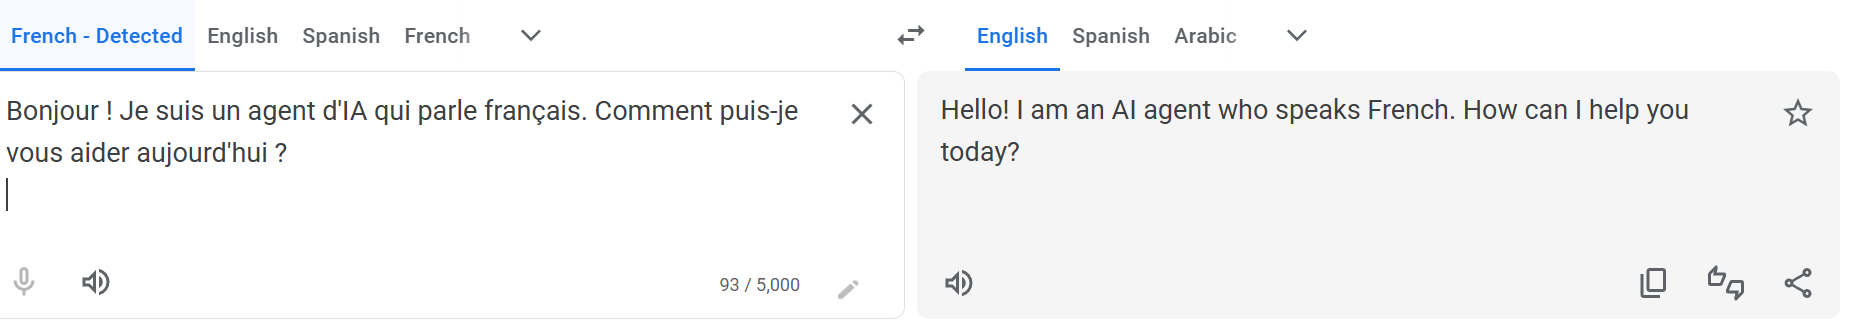